#Fake News Classification
----
Rosales Herrera Jonathan Adrian

##Librerías

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

###Kaggle Settings

In [2]:
from google.colab import files
files.upload() #Subimos API de Kaggle

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"johnr0s","key":"0facb189e871c75a90374db6858537a2"}'}

In [5]:
!ls -lha kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!pwd
!chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 63 Dec  1 14:04 kaggle.json
/content


In [6]:
!kaggle datasets download -d saurabhshahane/fake-news-classification

 86% 79.0M/92.1M [00:01<00:00, 39.1MB/s]
100% 92.1M/92.1M [00:01<00:00, 61.4MB/s]


In [ ]:
!unzip fake-news-classification.zip

##Datos

In [9]:
data = pd.read_csv('/content/WELFake_Dataset.csv')

###Análisis Preeliminar

In [10]:
data.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [12]:
data.shape

(72134, 4)

In [13]:
data.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [14]:
data.sample()

,Unnamed: 0,title,text,label
44327,44327,DETROIT: IMMIGRANT STEALS $132 MILLION From Me...,A health care executive cheated Medicare out o...,1


In [16]:
data.tail()

,Unnamed: 0,title,text,label
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0
72133,72133,Goldman Sachs Endorses Hillary Clinton For Pre...,Goldman Sachs Endorses Hillary Clinton For Pre...,1


In [21]:
data.describe()

,Unnamed: 0,label
count,72134.000000,72134.000000
mean,36066.500000,0.514404
std,20823.436496,0.499796
min,0.000000,0.000000
25%,18033.250000,0.000000
50%,36066.500000,1.000000
75%,54099.750000,1.000000
max,72133.000000,1.000000


In [18]:
data.isna().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [22]:
data.nunique()

Unnamed: 0    72134
title         62347
text          62718
label             2
dtype: int64

In [23]:
data.label.value_counts()

1    37106
0    35028
Name: label, dtype: int64

##Limpieza

Creamos una copia del conjunto rellenando las cadenas nulas

In [24]:
df = data.fillna(' ')

Eliminamos la primer columna que repite el índice

In [26]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

###Transformación

Agregamos dos características nuevas

In [27]:
df['corpus'] = df['title']+df['text']
df['length'] = df['corpus'].apply(lambda x: len(x) - x.count(' '))

Visualizamos un comparativo de *fake* y *real news*

<Axes: xlabel='length', ylabel='Density'>

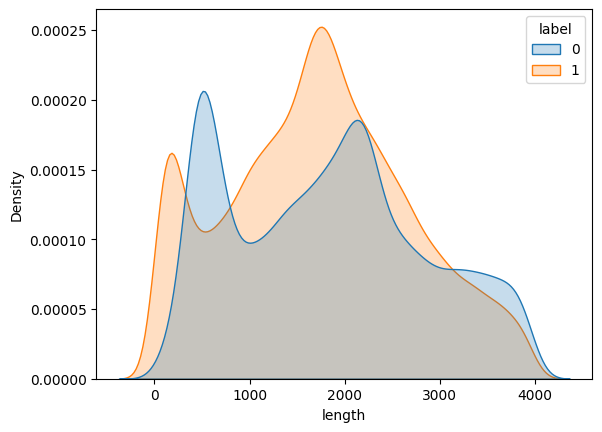

In [30]:
sns.kdeplot(data  = df[df['length'] < df['length'].quantile(0.80)], x= 'length', hue = 'label', fill = True)

Separamos las variables del conjunto X y y

In [64]:
X, y = df[['title', 'text', 'corpus']], df['label']

Dividimos en conjunto de prueba y entrenamiento

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

Creamos una variable CountVectorizer y transformamos las variables X

In [66]:
cvec = CountVectorizer(stop_words='english')

In [67]:
c_train = cvec.fit_transform(X_train['corpus'])
c_test = cvec.transform(X_test['corpus'])

##Modelo

Creamos un modelo RandomForest

In [68]:
ranfor = RandomForestClassifier(n_estimators=100)
ranfor.fit(c_train, y_train)

RandomForestClassifier()

Obtenemos una predicción del modelo

In [70]:
y_pred = ranfor.predict(c_test)

Creamos un nuevo conjunto con los resultados

In [71]:
news = pd.DataFrame(X_test)
news['label'] = y_test.to_numpy()
news['pred'] = y_pred

In [72]:
news

,title,text,corpus,label,pred
61370,ARNOLD SCHWARZENEGGER Sends A Message To Liber...,,ARNOLD SCHWARZENEGGER Sends A Message To Liber...,1,1
2189,WOW! “We Mexicans Need To Kill Donald Trump Be...,And now a message of peace and unity from one ...,WOW! “We Mexicans Need To Kill Donald Trump Be...,1,1
60609,Jimmy Carter recovers from dehydration scare i...,"WINNIPEG, Manitoba (Reuters) - Former U.S. Pre...",Jimmy Carter recovers from dehydration scare i...,0,0
51565,2 Friars’ Mission: Reviving a Brooklyn Church ...,"The two Franciscan friars, complete with rob...",2 Friars’ Mission: Reviving a Brooklyn Church ...,0,0
39431,Boy With Autism Makes His First Friend Ever An...,Approximately 1 in 68 children has an autism s...,Boy With Autism Makes His First Friend Ever An...,1,1
...,...,...,...,...,...
31201,Obama takes fire for,"Jindal, the Republican governor of Louisiana, ...","Obama takes fire forJindal, the Republican gov...",0,0
43166,NBC’s TRUMP-BASHING Chief White House Reporter...,The obnoxious anti-Trump Hallie Jackson of NBC...,NBC’s TRUMP-BASHING Chief White House Reporter...,1,1
49865,UK manages to go half an hour without a racist...,Next Swipe left/right UK manages to go half an...,UK manages to go half an hour without a racist...,1,1
9736,Ucla Prof Would Rather Vote For Dog Poop Than ...,Re: #UCLA PROF WOULD RATHER VOTE FOR DOG POOP ...,Ucla Prof Would Rather Vote For Dog Poop Than ...,1,1


In [75]:
accuracy_score(news['label'], news['pred'])

0.943628130487016

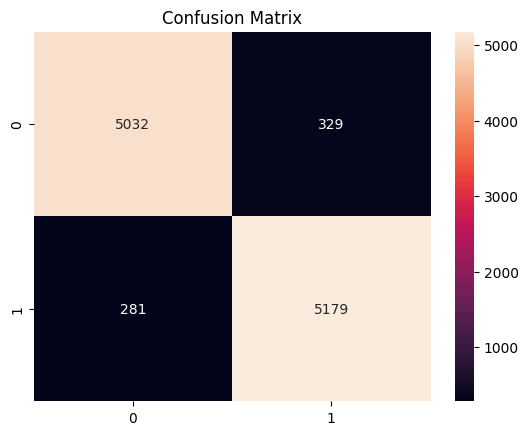

In [78]:
cm = confusion_matrix(news['label'], news['pred'])
sns.heatmap(cm, annot = True, fmt = '')
plt.title('Confusion Matrix')
plt.show()

Observamos un gráfico con la comparación entre variables

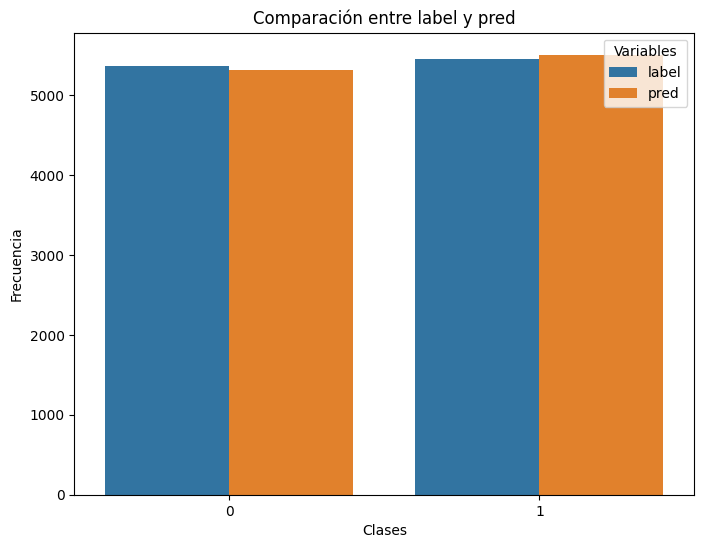

In [80]:
plt.figure(figsize=(8, 6))
sns.countplot(data=news[['label', 'pred']].melt(), x='value', hue='variable')
plt.title('Comparación entre label y pred')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.legend(title='Variables')
plt.show()